In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set options
pd.set_option('display.max_columns',100)
# Customize figure style for stakeholder-facing visualizations
plt.style.use(('ggplot','fivethirtyeight'))
sns.set_context('notebook', font_scale=1.2)
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

In [24]:
df = pd.read_csv("Data/RAW - Crime_Data.csv",
                 low_memory=False)
## Converting crimedatetime and coercing errors
df['CrimeDateTime'] = pd.to_datetime(df['CrimeDateTime'], errors='coerce')
df = df.dropna(subset=['CrimeDateTime'])
## setting and sorting the index
df = df.set_index("CrimeDateTime")
df = df.sort_index()
df.head(3)

,X,Y,RowID,CCNumber,CrimeCode,Description,Inside_Outside,Weapon,Post,Gender,Age,Race,Ethnicity,Location,Old_District,New_District,Neighborhood,Latitude,Longitude,GeoLocation,PremiseType,Total_Incidents
CrimeDateTime,,,,,,,,,,,,,,,,,,,,,,
1920-06-18 01:30:00+00:00,-76.566719,39.291959,456625,22F05949,3AO,ROBBERY,NaN,PERSONAL_WEAPONS,223,M,20.0,WHITE,HISPANIC_OR_LATINO,3700 LEVERTON AVE,SOUTHEAST,NaN,BALTIMORE HIGHLANDS,39.291959,-76.566719,"(39.291958801122256,-76.56671900138528)",NaN,1
1922-06-22 13:00:00+00:00,-76.612378,39.276740,456624,22F07001,4E,COMMON ASSAULT,NaN,PERSONAL_WEAPONS,942,M,58.0,WHITE,NaN,1100 LIGHT ST,SOUTHERN,NaN,FEDERAL HILL,39.276740,-76.612378,"(39.276739999999997,-76.612378000000007)",NaN,1
1963-10-30 00:00:00+00:00,-76.702653,39.326879,456623,17K02992,2A,RAPE,I,OTHER,622,F,32.0,BLACK_OR_AFRICAN_AMERICAN,NaN,3100 FERNDALE AVE,NORTHWEST,NaN,HOWARD PARK,39.326879,-76.702653,"(39.326879,-76.702653)",ROW/TOWNHOUSE-OCC,1


In [25]:
## baltimore is in eastern time zone,but can just use tz-naive index by choosing None
df = df.tz_convert(None)
df.head(3)

,X,Y,RowID,CCNumber,CrimeCode,Description,Inside_Outside,Weapon,Post,Gender,Age,Race,Ethnicity,Location,Old_District,New_District,Neighborhood,Latitude,Longitude,GeoLocation,PremiseType,Total_Incidents
CrimeDateTime,,,,,,,,,,,,,,,,,,,,,,
1920-06-18 01:30:00,-76.566719,39.291959,456625,22F05949,3AO,ROBBERY,NaN,PERSONAL_WEAPONS,223,M,20.0,WHITE,HISPANIC_OR_LATINO,3700 LEVERTON AVE,SOUTHEAST,NaN,BALTIMORE HIGHLANDS,39.291959,-76.566719,"(39.291958801122256,-76.56671900138528)",NaN,1
1922-06-22 13:00:00,-76.612378,39.276740,456624,22F07001,4E,COMMON ASSAULT,NaN,PERSONAL_WEAPONS,942,M,58.0,WHITE,NaN,1100 LIGHT ST,SOUTHERN,NaN,FEDERAL HILL,39.276740,-76.612378,"(39.276739999999997,-76.612378000000007)",NaN,1
1963-10-30 00:00:00,-76.702653,39.326879,456623,17K02992,2A,RAPE,I,OTHER,622,F,32.0,BLACK_OR_AFRICAN_AMERICAN,NaN,3100 FERNDALE AVE,NORTHWEST,NaN,HOWARD PARK,39.326879,-76.702653,"(39.326879,-76.702653)",ROW/TOWNHOUSE-OCC,1


In [26]:
## Drop extra columns not needed
drop_cols = ['X', 'Y', 'CCNumber','RowID','Post','GeoLocation', 'Location', 'PremiseType', 'New_District']
df = df.drop(columns=drop_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 581775 entries, 1920-06-18 01:30:00 to 2023-08-28 22:55:00
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CrimeCode        581775 non-null  object 
 1   Description      581775 non-null  object 
 2   Inside_Outside   448326 non-null  object 
 3   Weapon           143038 non-null  object 
 4   Gender           488156 non-null  object 
 5   Age              468205 non-null  float64
 6   Race             563609 non-null  object 
 7   Ethnicity        55966 non-null   object 
 8   Old_District     565277 non-null  object 
 9   Neighborhood     572845 non-null  object 
 10  Latitude         580775 non-null  float64
 11  Longitude        580775 non-null  float64
 12  Total_Incidents  581775 non-null  int64  
dtypes: float64(3), int64(1), object(9)
memory usage: 62.1+ MB


# Feature Engineering & Initial EDA


In [27]:
## saving just the date (no time) as a column
df['Date'] = df.index.date
# could also use .strftime + pd.to_datetime
# df['Date'] = pd.to_datetime(df.index.strftime('%Y-%m-%d'))
df.head(3)

,CrimeCode,Description,Inside_Outside,Weapon,Gender,Age,Race,Ethnicity,Old_District,Neighborhood,Latitude,Longitude,Total_Incidents,Date
CrimeDateTime,,,,,,,,,,,,,,
1920-06-18 01:30:00,3AO,ROBBERY,NaN,PERSONAL_WEAPONS,M,20.0,WHITE,HISPANIC_OR_LATINO,SOUTHEAST,BALTIMORE HIGHLANDS,39.291959,-76.566719,1,1920-06-18
1922-06-22 13:00:00,4E,COMMON ASSAULT,NaN,PERSONAL_WEAPONS,M,58.0,WHITE,NaN,SOUTHERN,FEDERAL HILL,39.276740,-76.612378,1,1922-06-22
1963-10-30 00:00:00,2A,RAPE,I,OTHER,F,32.0,BLACK_OR_AFRICAN_AMERICAN,NaN,NORTHWEST,HOWARD PARK,39.326879,-76.702653,1,1963-10-30


## Year

In [28]:
## Engineering Features using components of the date/time
df['Year']  = df.index.year

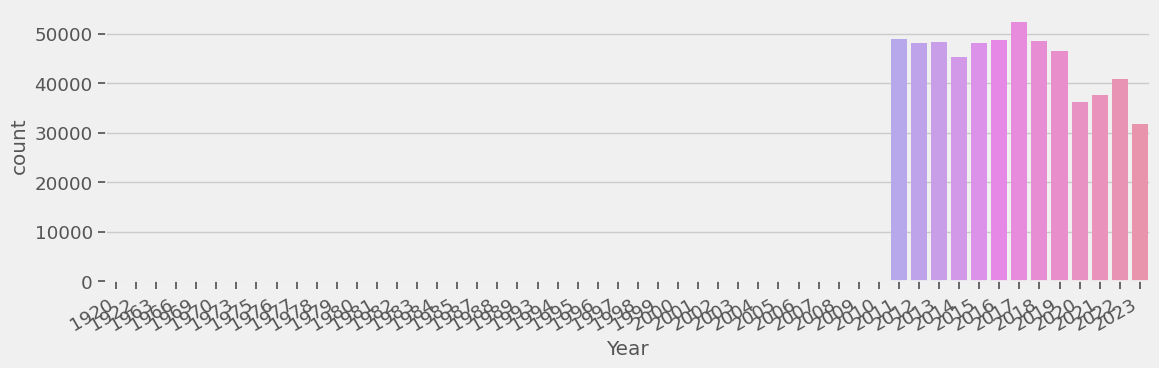

In [29]:
## Visualize years
ax = sns.countplot(data=df, x='Year')
fig = ax.get_figure()
fig.autofmt_xdate()

In [30]:
# value counts to confirm no crime reported before 2009
df['Year'].value_counts().sort_index(ascending = False).head(15)

2023    31861
2022    40797
2021    37731
2020    36295
2019    46606
2018    48600
2017    52300
2016    48676
2015    48073
2014    45228
2013    48331
2012    48142
2011    48966
2010       28
2009       15
Name: Year, dtype: int64

In [31]:
## keeping data from yr 2011 to present
df = df.loc['2011':'2022'].copy()

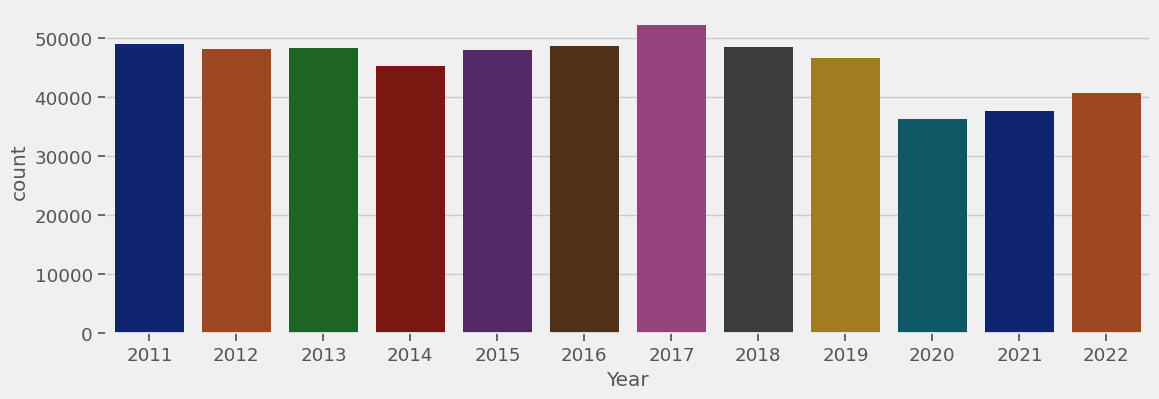

In [32]:
## visualizing again with years removed
sns.countplot(data=df, x='Year',palette='dark');

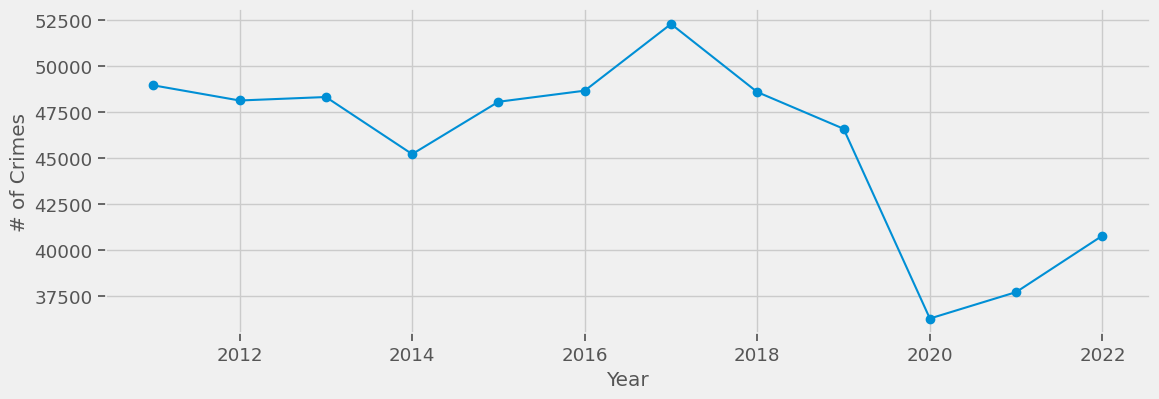

In [33]:
## save year counts
year_counts = df['Year'].value_counts().sort_index()
year_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Year');

As we can see above, it looks like overall total crime has decreased since the pandemic start in late 2019. (Keep in mind data was not completed for 2022 at the time this was produced)

## Month

In [36]:
## Extracting the Month
df['Month'] = df.index.month
df['MonthName'] = df.index.month_name()
df.head(3)

,CrimeCode,Description,Inside_Outside,Weapon,Gender,Age,Race,Ethnicity,Old_District,Neighborhood,Latitude,Longitude,Total_Incidents,Date,Year,Month,MonthName
CrimeDateTime,,,,,,,,,,,,,,,,,
2011-01-01,2A,RAPE,NaN,OTHER,M,16.0,BLACK_OR_AFRICAN_AMERICAN,NaN,WESTERN,HARLEM PARK,39.298964,-76.639291,1,2011-01-01,2011,1,January
2011-01-01,6E,LARCENY,O,NaN,M,44.0,BLACK_OR_AFRICAN_AMERICAN,NaN,WESTERN,MOSHER,39.295633,-76.661518,1,2011-01-01,2011,1,January
2011-01-01,6G,LARCENY,I,NaN,F,26.0,WHITE,NaN,SOUTHERN,FEDERAL HILL,39.276987,-76.613380,1,2011-01-01,2011,1,January


In [37]:
#create a dictionary to match the number of the month with the name
# saving lookup for number vs name
unique_months = df.drop_duplicates(subset=['Month']).sort_values('Month')
month_lookup =dict(zip(unique_months['Month'],unique_months['MonthName']))
month_lookup

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

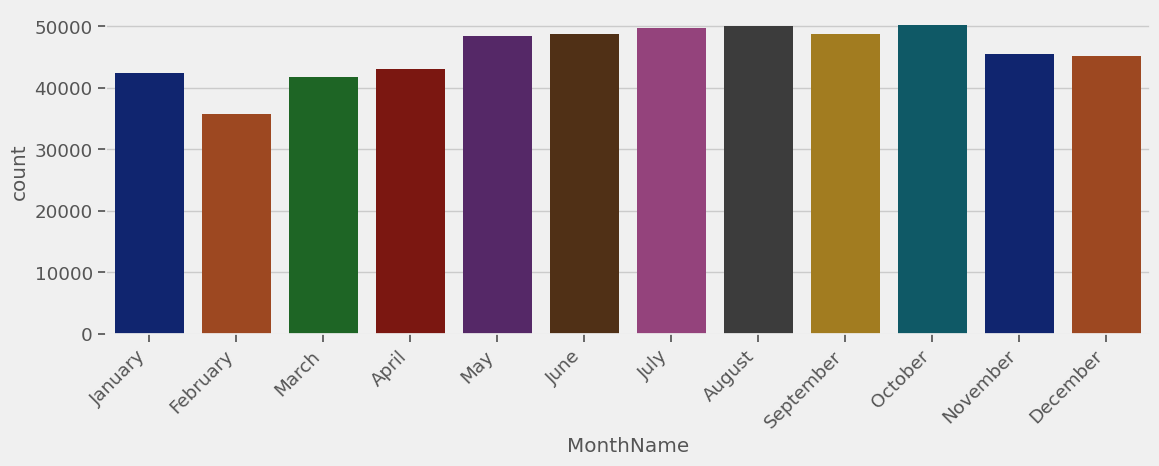

In [39]:
#countplot by month
ax = sns.countplot(data=df, x='MonthName',palette='dark',order=month_lookup.values());
# Rotate xtick labels and align the text to the bar
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

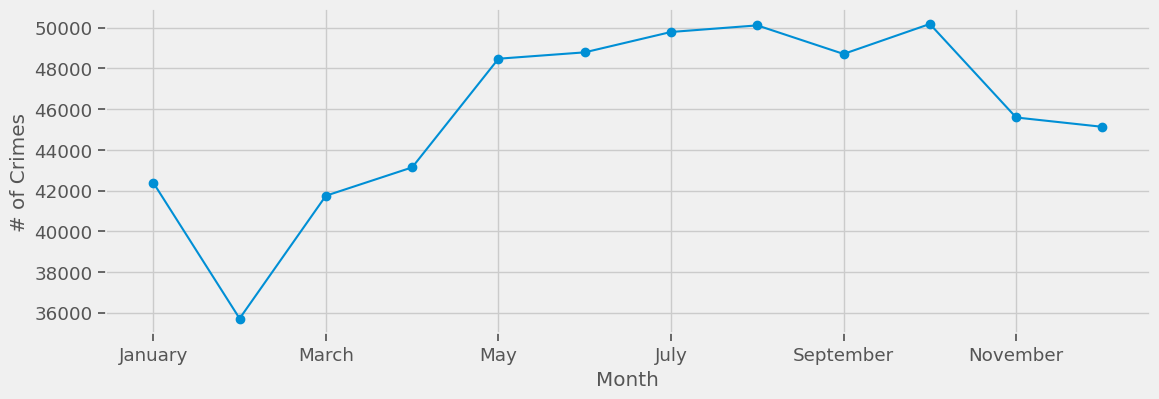

In [40]:
## save month counts
month_counts = df['MonthName'].value_counts()[month_lookup.values()]
# year_counts = df.groupby("Year").size()
ax = month_counts.plot(style='o-',grid=True,
                       ylabel='# of Crimes',
                       xlabel='Month');

# Day of Week


In [41]:
## adding day of week as both number & name
df['DayOfWeek'] = df.index.day_name()
df['DayNum'] = df.index.day_of_week
df.head(3)

,CrimeCode,Description,Inside_Outside,Weapon,Gender,Age,Race,Ethnicity,Old_District,Neighborhood,Latitude,Longitude,Total_Incidents,Date,Year,Month,MonthName,DayOfWeek,DayNum
CrimeDateTime,,,,,,,,,,,,,,,,,,,
2011-01-01,2A,RAPE,NaN,OTHER,M,16.0,BLACK_OR_AFRICAN_AMERICAN,NaN,WESTERN,HARLEM PARK,39.298964,-76.639291,1,2011-01-01,2011,1,January,Saturday,5
2011-01-01,6E,LARCENY,O,NaN,M,44.0,BLACK_OR_AFRICAN_AMERICAN,NaN,WESTERN,MOSHER,39.295633,-76.661518,1,2011-01-01,2011,1,January,Saturday,5
2011-01-01,6G,LARCENY,I,NaN,F,26.0,WHITE,NaN,SOUTHERN,FEDERAL HILL,39.276987,-76.613380,1,2011-01-01,2011,1,January,Saturday,5


In [42]:
# saving lookup for number vs named days
unique_days = df.drop_duplicates(subset=['DayNum']).sort_values('DayNum')
day_lookup =dict(zip(unique_days['DayNum'],unique_days['DayOfWeek']))
day_lookup

{0: 'Monday',
 1: 'Tuesday',
 2: 'Wednesday',
 3: 'Thursday',
 4: 'Friday',
 5: 'Saturday',
 6: 'Sunday'}

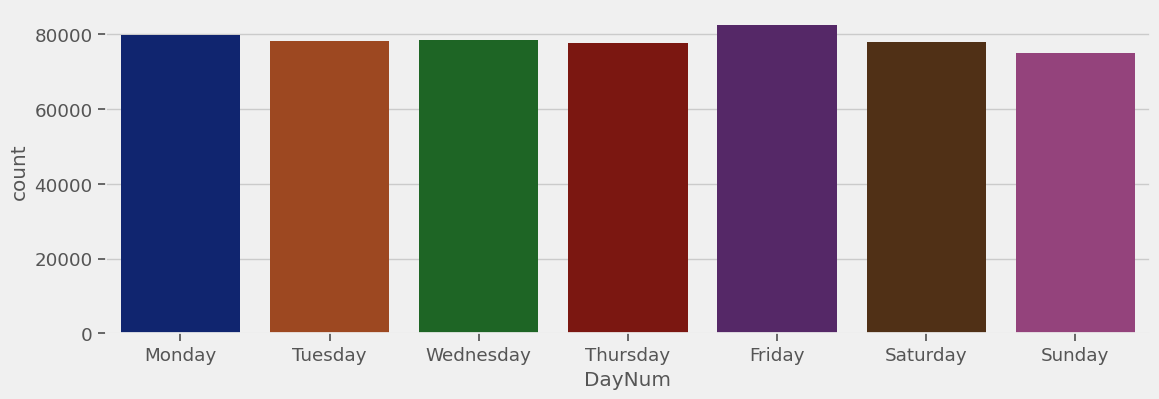

In [43]:
## plot DayNum, but use names from day_lookup for ticks
ax = sns.countplot(data=df, x='DayNum',palette='dark')
ax.set_xticklabels([v for k,v in day_lookup.items()]);

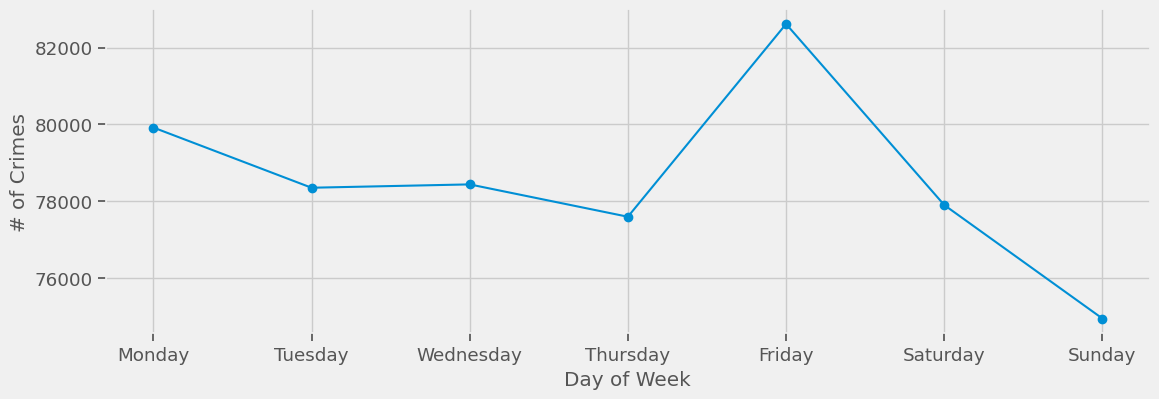

In [44]:
## save day counts
day_counts = df['DayNum'].value_counts().sort_index()
## now that its in order, rename using day_lookup
day_counts = day_counts.rename(day_lookup)
ax = day_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Day of Week')

## Weekend


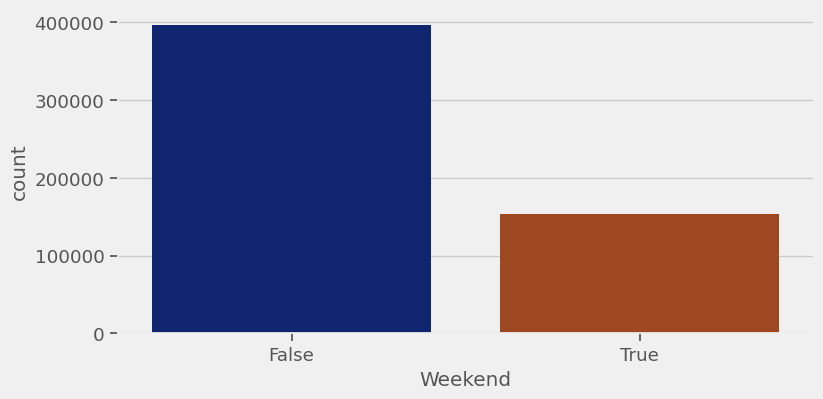

In [45]:
# how crime on weekend days compares with crime on weekdays
df['Weekend'] = df['DayOfWeek'].isin(['Saturday','Sunday'])
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Weekend',palette='dark');

At first glance, this graph could be misleading. It looks like crime is much more common on weekdays, BUT remember there are 5 weekdays and only 2 weekend days. A better approach is to normalize this for comparison by looking at crimes per day.

In [46]:
## calculating value counts and then dividing week days by 5 and weekend by 2
weekend_counts = df["Weekend"].value_counts()
weekend_counts.loc[False] /= 5
weekend_counts.loc[True] /= 2
weekend_counts

False    79381.4
True     76419.0
Name: Weekend, dtype: float64

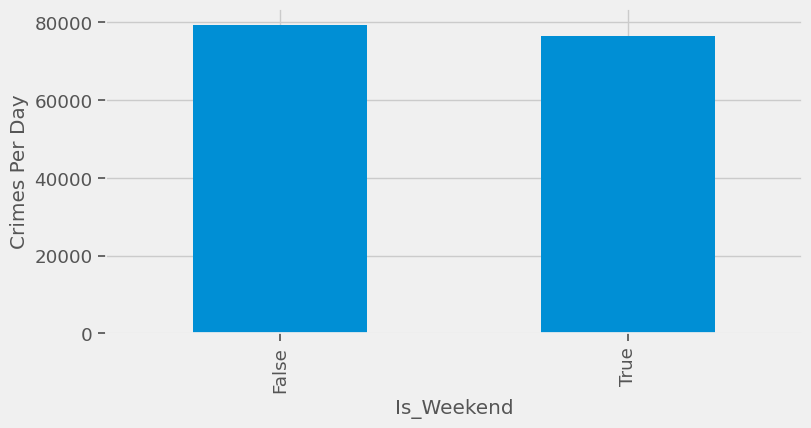

In [48]:
#Normalized data to day values (weekday vs. weekend day)
ax = weekend_counts.plot(kind='bar',figsize=(8,4))
ax.set(ylabel='Crimes Per Day', xlabel='Is_Weekend');

After normalizing by # of days, weekends and weekdays look much closer.

## Hour of the Day


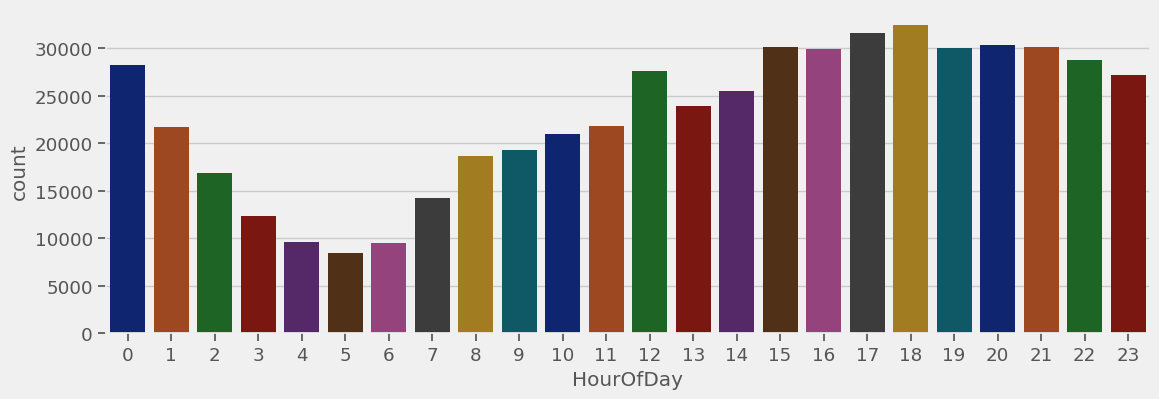

In [49]:
# adding hour of the day (12am=0) 
df['HourOfDay'] = df.index.hour 
sns.countplot(data=df, x='HourOfDay',palette='dark');

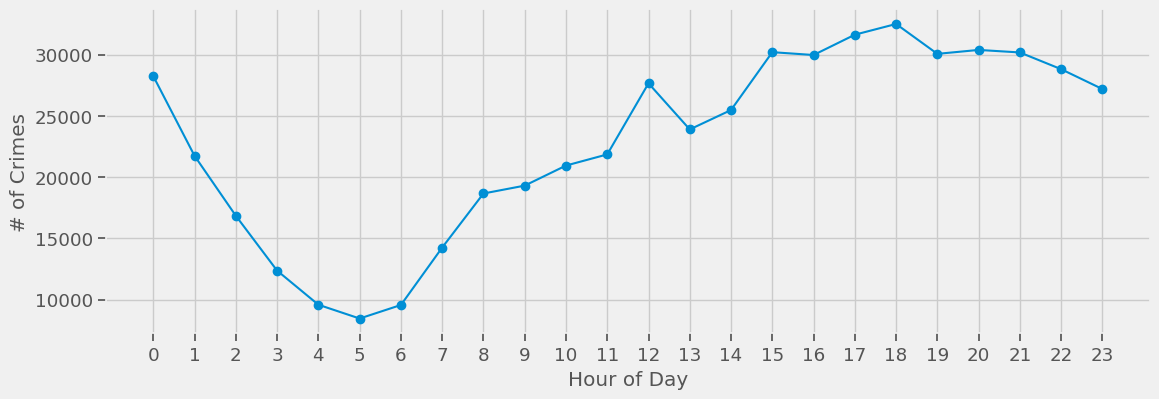

In [50]:
## save hour counts
hour_counts = df['HourOfDay'].value_counts().sort_index()
# year_counts = df.groupby("Year").size()
ax = hour_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Hour of Day',xticks=hour_counts.index);